# DAE Correlation and Regression

author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---

## Learning goals
After working your way through this notebook you should be able to..
- Explain what correlation can measure and when it should not be used
- Explain what the Pearson correlation coefficient is
- Explain how linear regression can be useful.

## Table of Contents
- [Relationship between Variables](#Relationships)  
- [Covarience](#Covarience)
- [Correlation coefficient](#Coefficient)
- [Linear regression](#Regression)
- [Practical Applications with Sensors](#Sensors)


<a id= 'Variables'> </a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving DanceTempoData.txt to DanceTempoData.txt
Saving DistanceSensorData.csv to DistanceSensorData.csv
Saving ForceCaibrationData.txt to ForceCaibrationData.txt
Saving MusicRatingDataCSV (2).csv to MusicRatingDataCSV (2).csv


<a id= 'Relationships'> </a>

## 1. Relationship between Variables

For both independent and dependent variables we are often interested in seeing whether they have some kind of relationship. A good way to study this is to plot the data against each other 

In [ ]:

#We return to the ratings of the ICE-instrument music
df = pd.read_csv('MusicRatingDataCSV (2).csv')
#check dimensions and content of the data structure
print(df.shape)
df.describe()

(41, 4)


,SKILL,QUALITY,PLEASANTNESS
count,41.000000,41.000000,41.000000
mean,70.682927,46.926829,65.243902
std,18.913539,24.764279,22.429646
min,30.000000,0.000000,11.000000
25%,59.000000,30.000000,51.000000
50%,71.000000,40.000000,70.000000
75%,85.000000,64.000000,83.000000
max,100.000000,100.000000,97.000000


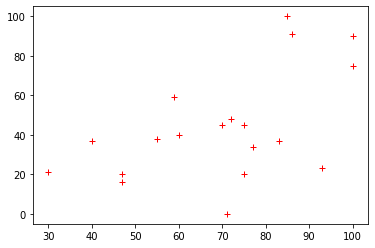

In [ ]:
# to plot SKILL vs. QUALITY ratings against each other for the audio group (in red + signs):
plt.plot(df.loc[df['GROUP']=='audio'].SKILL, df.loc[df['GROUP']=='audio'].QUALITY, 'r+')

### Try out 1:

Text(0.5, 1.0, 'QUALITY vs SKILL')

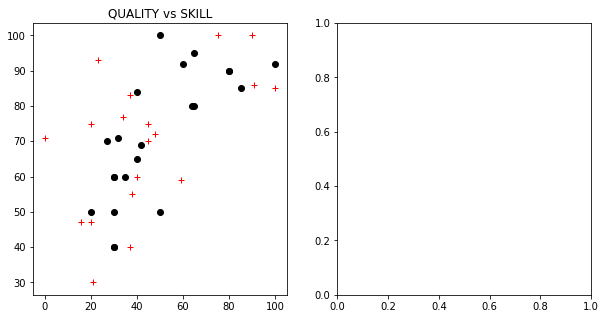

In [ ]:
#Let's plot for both groups and see if there is any relationship between scales.
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(10.0, 5.0))

ax1.plot(df.loc[df['GROUP']=='audio'].QUALITY, df.loc[df['GROUP']=='audio'].SKILL,'r+')
ax1.plot(df.loc[df['GROUP']=='audiovisual'].QUALITY, df.loc[df['GROUP']=='audiovisual'].SKILL,'ko')
ax1.set_title('QUALITY vs SKILL')

#Now complete to plot Quality vs another scale for the other subplot 


Indeed it might look like there is a tendency for high ratings on one scale seem to result in high ratings on another one. And vice versa. How can we quantify this in a good way?

<a id= 'Covariance'> </a>

## 2. Covariance

In the case of variance of one variable summed up the squared distance between each observation and the mean. To see whether two variables, x and y, *covary* we do a similar thing: 

$$cov(x,y)  =\frac {\sum{ (x_i - \bar{x}) (y_i - \bar{y})} } {N-1}$$

A positive covariance mean that x and y vary in similar way so that with X larger than the mean Y is also more likely to be larger than the mean. And vice versa. Note that this does not mean that a change in X *causes* Y to vary! 

We can use the in-built function in pandas to calculate covariance for the whole data set:

In [ ]:
df.cov()

,SKILL,QUALITY,PLEASANTNESS
SKILL,357.721951,296.851220,178.679268
QUALITY,296.851220,613.269512,267.768293
PLEASANTNESS,178.679268,267.768293,503.089024


This outputs a covariance matrix, where we can see that the diagonal naturally result in high covariance, but also that Quality and Skill overall seem to covary.

<a id= 'Coefficient'> </a>

## 3. Correlation coefficient

The Pearson Product-Moment Correlation Coefficient (r, or "correlation coefficient" for short) is a standardized measure of the linear relationship between two variables. The degree to which the relationship
can be explained by a linear model is expressed by the coefficient, r.

Departing from the covariance, the equation for the coefficient can be written as

$$r =  \frac {cov_{xy}} {s_x s_y} =\frac {\sum{ (x_i - \bar{x}) (y_i - \bar{y})} } {(N-1){s_x s_y}}$$

Where $s_x$ and $s_y$ are the sample standard deviations for x and y. Dividing the covariance with them gives a value which can vary between 1 (x and y perfectly correlated) and -1 (x and y perfectly negatively correlated)




In [ ]:
#df.corr(df.loc[df['GROUP']=='audio'].QUALITY, df.loc[df['GROUP']=='audio'].SKILL)
df.corr(method='pearson')

,SKILL,QUALITY,PLEASANTNESS
SKILL,1.000000,0.633783,0.421191
QUALITY,0.633783,1.000000,0.482071
PLEASANTNESS,0.421191,0.482071,1.000000


By calculating the correlation coefficient for different ratings of the same stimuli, it is possible to get a measure of how *reliable* the measure is. For instance one can use it to see to what degree participants tend to rate a stimulus the same way when presented with it several times. An unreliable measure has a large variability due to noise, which would be reflected in an $r$ close to 0. 


### Dance Tempo vs. Body Morphology
Now let's try with some of my own research data!
This data was collected in an experiment on preferred dance tempo. Participants were asked to try out different dance tempi and select their preferred one, after which their measures were taken.


In [ ]:
#Load the data "DanceTempoData.txt' 
measures = pd.read_csv('DanceTempoData.txt', delimiter = '\t', header=0) 
measures.describe()
#The columns should be Participant#; Sex; Tempo; Height; Shoulder; LeffLeg; RightLeg; Weight.
#But checking Weight something is not right 


,Sex,Tempo,Height,Shoulder,LeftLeg,RightLeg,Weight
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,0.0
mean,152.566667,170.066667,43.321667,85.983333,86.316667,71.103333,NaN
std,44.932657,10.042782,6.452127,5.462227,5.842005,18.147926,NaN
min,89.000000,151.500000,36.000000,76.000000,75.500000,46.100000,NaN
25%,113.250000,163.250000,39.500000,81.125000,81.125000,58.175000,NaN
50%,152.500000,168.250000,41.500000,85.750000,86.500000,63.200000,NaN
75%,185.000000,177.000000,45.875000,89.875000,91.000000,80.550000,NaN
max,239.000000,187.000000,71.400000,97.500000,99.500000,130.000000,NaN


In [ ]:
#The tab separation is not correctly read, try '\s+' for delimiter instead
measures = pd.read_csv('DanceTempoData.txt', delimiter = '\s+', header=0) 
measures.describe()

#Here we will only use the numerical values.

,Part.,Tempo,Height,Shoulder,LeftLeg,RightLeg,Weight
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.466667,152.566667,170.066667,43.321667,85.983333,86.316667,71.103333
std,8.842426,44.932657,10.042782,6.452127,5.462227,5.842005,18.147926
min,1.000000,89.000000,151.500000,36.000000,76.000000,75.500000,46.100000
25%,8.250000,113.250000,163.250000,39.500000,81.125000,81.125000,58.175000
50%,15.500000,152.500000,168.250000,41.500000,85.750000,86.500000,63.200000
75%,22.750000,185.000000,177.000000,45.875000,89.875000,91.000000,80.550000
max,30.000000,239.000000,187.000000,71.400000,97.500000,99.500000,130.000000


The data has measurements for both right and left leg. We can make another variable with the average leg length.

In [ ]:
#Make variable with average leg length

measures['AvgLeg'] = (measures.LeftLeg+measures.RightLeg)/2

measures.describe()


,Part.,Tempo,Height,Shoulder,LeftLeg,RightLeg,Weight,AvgLeg
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.466667,152.566667,170.066667,43.321667,85.983333,86.316667,71.103333,86.150000
std,8.842426,44.932657,10.042782,6.452127,5.462227,5.842005,18.147926,5.633031
min,1.000000,89.000000,151.500000,36.000000,76.000000,75.500000,46.100000,75.750000
25%,8.250000,113.250000,163.250000,39.500000,81.125000,81.125000,58.175000,81.062500
50%,15.500000,152.500000,168.250000,41.500000,85.750000,86.500000,63.200000,86.375000
75%,22.750000,185.000000,177.000000,45.875000,89.875000,91.000000,80.550000,90.312500
max,30.000000,239.000000,187.000000,71.400000,97.500000,99.500000,130.000000,98.500000


### Try out 2

1) Plot the preferred tempo (in beats/min) against  participants' weight in a scatter plot. 

2) Is there a relationship? Describe the type of relationship (linear? positive? negative? none?)

3) Calculate the correlation between height and average leg length.

4) Use the same function to get a full correlation matrix and check correlations between other variables.

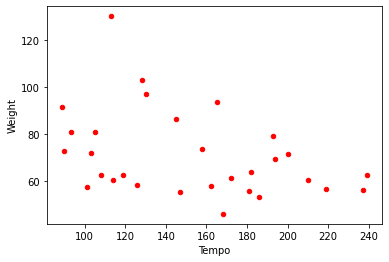

In [ ]:
#Solution 1: Use plt.plot to make a scatter plot. Departing from this, answer 2

measures.plot.scatter(x='Tempo',
                      y='Weight',
                      c='Red')

#Is there a relationship? Describe the type of relationship(Linear,positive,negative,none?)

#It seems that there is a correlation, between the weight and tempo of a person. But it is slim.
#The persons in the lower weight percentile have a higher tempo

Solution 2: 

In [ ]:
#Solution 3: Use pandas corr function but specify individual columns'
print("The correlation between height and average leg: ")
print(measures.Height.corr(measures.AvgLeg, method="pearson"))

The correlation between height and average leg: 
0.7967973631271186


In [ ]:
#Solution 4: Use pandas corr function
measures.corr(method="pearson")

,Part.,Tempo,Height,Shoulder,LeftLeg,RightLeg,Weight,AvgLeg
Part.,1.000000,-0.405389,0.420369,-0.090360,0.432813,0.449290,-0.030760,0.442824
Tempo,-0.405389,1.000000,-0.667927,-0.132861,-0.655383,-0.685707,-0.383352,-0.673328
Height,0.420369,-0.667927,1.000000,0.276396,0.784049,0.803511,0.650392,0.796797
Shoulder,-0.090360,-0.132861,0.276396,1.000000,0.105828,0.104742,0.443117,0.105623
LeftLeg,0.432813,-0.655383,0.784049,0.105828,1.000000,0.986501,0.408232,0.996388
RightLeg,0.449290,-0.685707,0.803511,0.104742,0.986501,1.000000,0.431495,0.996843
Weight,-0.030760,-0.383352,0.650392,0.443117,0.408232,0.431495,1.000000,0.421678
AvgLeg,0.442824,-0.673328,0.796797,0.105623,0.996388,0.996843,0.421678,1.000000


### Answer: 
Based on these results, would you say that there is a relationship between any of the body morphology measures and preferred dance tempo?

ANSWER:  Yes, leg length and height have fairly large correlations with Tempo. You can read more about the experiment and data analayis in 

Dahl, Sofia et al. “Preferred Dance Tempo: Does Sex or Body Morphology Influence How We Groove?” Journal of new music research 43.2 (2014): 214–223. 

<a id= 'Regression'> </a>

## 4. Linear Regression

While a correlation coefficient can give an estimate of the strength of a relationship, it is often useful to actually *model* it. This would allow us to *predict* how a dependent variable will behave as an independent varies. 

In linear regression, a variable $y$ is predicted by $x$ in terms of a linear relationship between the two. The method finds the straight line that best fits the data points and $y$ is expressed in terms of $x$ in the common equation:

$$y=ax+b$$

Where $a$ is a measure of the inclination (the "steepness" of the line) and the constant $b$ is the *intercept* (the value of $y$ when $x=0$). 



We will now make a fit with the morphological data from the dance tempo experiment.


In [ ]:
#To do this we can use the polyfit function from numpy
model=np.polyfit(measures.AvgLeg,measures.Tempo,1)
#The function can fit higher order polynomials to data, but here we're only interested in 1st order 

model #prints the output of the model (a and b in the equation above)  

array([ -5.37089763, 615.26949757])

What does this mean?
It means that the model which fits a line to the data would predict that as average leg lenght increases by 1 cm, the preferred dance tempo would drop by roughly 5 BPM. It also says that persons with average leg length of 0 cm would prefer to dance to 615 BPM. Which is of course complete nonsense. 

What about someone with an average leg length of 100 cm? We can use another function to get predicted data points out:


In [ ]:
predict=np.poly1d(model)
legs=100
predict(legs) #calculate the preferred dance tempo of someone with 1m legs

78.17973447801205

The model is not perfectly describing the data, we can study its fit by plotting the line with the data.

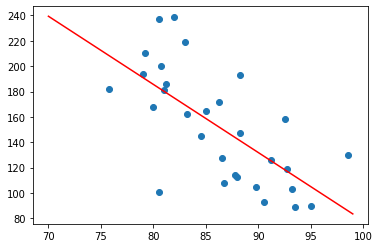

In [ ]:
x_lin_reg=range(70,100)
y_lin_reg=predict(x_lin_reg)

plt.scatter(measures.AvgLeg,measures.Tempo)
plt.plot(x_lin_reg,y_lin_reg, c='r')

In statistical modeling, the linear regression equation has $\alpha$ and $\beta$ are the inclination and intercept as before, but there is also an *error term* $\epsilon$ 

$$y=\alpha x+\beta + \epsilon$$

The error term says something about the difference between the fitted model and the data. 

And guess what? Fitting models like this and minimizing the error is the basis of machine learning!


<a id= 'Sensors'> </a>

## 5. Practical application with sensors

When dealing with sensors we typically get a voltage out for a particular input. Here the model of linear relationship comes really in handy for us because we typically are more interested in the input measure that causes the the voltage output (e.g. pressure, distance, force...). How can we know that the sensor is reliably measuring what we want so that an output voltage value actually corresponds to the input (whatever modality we're interested in)?


### Case one: Distance sensor

As an example let's look at the SHARP distance sensors. You have some data in DistanceSensorData.csv


In [ ]:
#Load the data
Sharp = pd.read_csv('DistanceSensorData.csv', delimiter = '\t',names=('Distance', 'ADC','Voltage'))
#check dimensions and content of the data structure
print(Sharp.shape)
Sharp.describe()

(150, 3)


,Distance,ADC,Voltage
count,150.00000,150.000000,150.000000
mean,755.00000,221.900000,1.084533
std,434.45368,153.191145,0.748466
min,10.00000,72.000000,0.350000
25%,382.50000,101.250000,0.492500
50%,755.00000,159.500000,0.780000
75%,1127.50000,309.750000,1.510000
max,1500.00000,600.000000,2.930000



We can use corr to calculate the correlations between these variables

In [ ]:
Sharp.corr(method='pearson')

,Distance,ADC,Voltage
Distance,1.000000,-0.876940,-0.877138
ADC,-0.876940,1.000000,0.999992
Voltage,-0.877138,0.999992,1.000000


But recall that we also need to LOOK at the data.

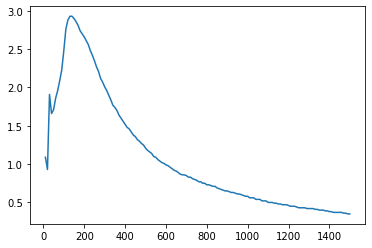

In [ ]:
plt.plot(Sharp.Distance, Sharp.Voltage)

For lower distances this is not a linear relationship at all!

### Try-out 3

Make a linear fit but restrict your model to the part where the relationship IS linear. 
How much voltage decrease with distance increase?

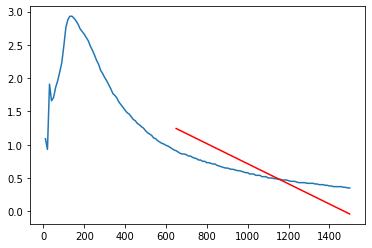

In [ ]:
#Solution 3: Select only data from about 650 mm and above

modelS=np.polyfit(Sharp.Distance,Sharp.Voltage,1)

predictS = np.poly1d(modelS)

xLinReg = range(650,1500)
yLinReg = predictS(xLinReg)

plt.plot(Sharp.Distance,Sharp.Voltage)
plt.plot(xLinReg,yLinReg, c='r')

### Case 2: Force data
This example is data from a pair of strain gauges on a drum stick, that were loaded with different weights on a thin thread. The strain gauges change the resistance with their deformation, so when the load was abruptly removed (the thread burned) we get another (unloaded) voltage out compared to when the weight was there (loaded).


Load the data "ForceCaibrationData.txt'. We will only use the first three columns: Weight ; loaded output  ; unloaded output.


In [ ]:
#Load the force calibration data
ForceCal = pd.read_csv('ForceCaibrationData.txt', delimiter = '\s+', usecols=[0, 1, 2],names=('Weight', 'loadedV','unloadedV'))
#check dimensions and content of the data structure
print(ForceCal.shape)
ForceCal.describe()

(27, 3)


,Weight,loadedV,unloadedV
count,27.000000,27.000000,27.000000
mean,552.037037,-0.037922,0.012718
std,345.757972,0.026089,0.009918
min,100.000000,-0.081808,0.000700
25%,195.000000,-0.058382,0.006997
50%,520.000000,-0.037491,0.008871
75%,800.000000,-0.012932,0.018811
max,1100.000000,-0.000552,0.040447


The weight should correspond to the *shift* in voltage output, so we make another variable with this difference.

In [ ]:
#create additional variable with difference
ForceCal['OutV']= ForceCal.loadedV-ForceCal.unloadedV

### Try-out 4
1)Plot the difference between loaded and unloaded output against weight in a scatter plot. 

2) Describe the type of relationship (linear? positive? negative? none?)

3) Use a corr function to see how much of the variation in voltage output that can be described by varying the weight applied. 

4) Fit a linear model and use its coefficients to complete the equation $$OutV= a*Weight + b$$

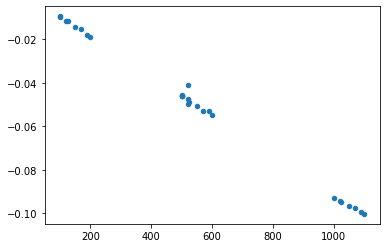

In [ ]:
#Solution 4.1

diffrences = ForceCal.loadedV-ForceCal.unloadedV 

plt.scatter(ForceCal.Weight, diffrences, s=20)

In [ ]:
#Solution 4.2 
#Describe the type of relationship: 

#The relationship seen on this plot is negative as they decrease in opposite directions 
#Since the y-axis decreases and x-axis increases 

In [ ]:
#Solution 4.3 
#3) Use a corr function to see how much of the variation in voltage output that can be described by varying the weight applied.

print("When looking at the output voltage and the changing Weight. We can see that the correlation value is changing towards -1.\n Which means that it gets more negatively correlated when the weight increases")
print()
print(ForceCal.corr)

# Emils metode
#sub = ForceCal[['OutV', 'Weight']]
#sub.corr(medthod='pearson')


When looking at the output voltage and the changing Weight. We can see that the correlation value is changing towards -1.
 Which means that it gets more negatively correlated when the weight increases

<bound method DataFrame.corr of     Weight   loadedV  unloadedV      OutV
0    100.0 -0.002369   0.007052 -0.009421
1    100.0 -0.008596   0.001256 -0.009852
2    120.0 -0.011010   0.000700 -0.011711
3    125.0 -0.010713   0.000960 -0.011674
4    150.0 -0.012667   0.001685 -0.014352
5    170.0 -0.004662   0.010496 -0.015158
6    190.0 -0.014093   0.003758 -0.017851
7    200.0 -0.013197   0.005709 -0.018906
8    500.0 -0.037491   0.008796 -0.046287
9    500.0 -0.037491   0.008796 -0.046287
10   520.0 -0.027602   0.022122 -0.049724
11   500.0 -0.037132   0.008716 -0.045848
12   520.0 -0.000552   0.040447 -0.040998
13   520.0 -0.040227   0.007035 -0.047262
14   525.0 -0.039292   0.009374 -0.048666
15   550.0 -0.042431   0.008188 -0.050619
16   570.0 -0.039737   0.013035 -0.052772
17   590.0

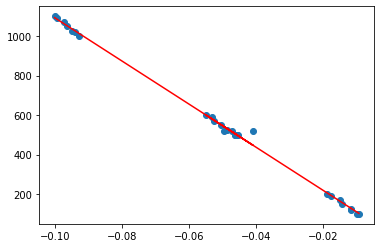

In [ ]:
#Solution 4.4
# 4) Fit a linear model and use its coefficients to complete the equation: OutV = a ∗ Weight + b 

model = np.polyfit(ForceCal.OutV, ForceCal.Weight, 1)
predict = np.poly1d(model)

xr = ForceCal.OutV
yr = predict(xr)

plt.scatter(ForceCal.OutV, ForceCal.Weight)
plt.plot(xr, yr, c='r')

Voluntary task: Rewrite the equation so that we get a measure of FORCE as output (and voltage as input variable).